## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import nltk

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction import _stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix,classification_report

# Task 1
## Importing Data

In [2]:
df = pd.read_csv('car_reviews.csv')
df.head()

,Sentiment,Review
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...


## Handling Data

- Checking data for missing values or if reviews are empty strings
- Dropping rows where above check is true

In [3]:
print(len(df))
df = df.dropna()
df = df[~df['Review'].str.isspace()]
df['Sentiment'].value_counts()

1382


Neg    691
Pos    691
Name: Sentiment, dtype: int64

## Performing Train/Test Split
- Splitting data into 80/20 train/test size
- Taking this precaution beforehand to only consider text from training set and to prevent leakage

In [4]:
X, y = df['Review'], df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 36) #36
print(f'train size: {len(X_train)}, test size: {len(X_test)}')
print(f'train size pct: {round(len(X_train)/len(X) * 100)}%, test size pct: {round(len(X_test)/len(X) * 100)}%')

train size: 1105, test size: 277
train size pct: 80%, test size pct: 20%


## Observing Stopwords

In [5]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emtiazsamad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emtiazsamad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Removing Stopwords, Punctuation from and Implementing Stemming
- Tokenise reviews
- Treat all characters as lowercase
- Strip tokens of punctuation
- Remove tokens that arent purely alphabetical
- Remove tokens that are known stopwords
- Remove all tokens with length 2 or less
- Handle stems of words to be considered as word

In [7]:
def stopword_removal(review):
    review = nltk.sent_tokenize(review)
    for i in range(len(review)):
        review[i] = review[i].lower()
        review[i] = re.sub(r'\W', ' ', review[i])
        review[i] = re.sub(r'\s+', ' ', review[i])
    
    tokens = review[0].split()
    tokens = [x for x in tokens if x.isalpha()]
    tokens = [x for x in tokens if not x in sw]
    tokens = [x for x in tokens if len(x) > 2]
    
    return tokens

def stem_removal(tokens):  
    sbs = SnowballStemmer('english')
    sr_tokens = []
    for token in tokens:
        sr_tokens.append(sbs.stem(token))
    
    return sr_tokens

def ss_removal(review):
    return ' '.join(stem_removal(stopword_removal(review)))

In [8]:
print(ss_removal(X_train.iloc[0]).split()[:100])

['alway', 'like', 'ford', 'explor', 'matter', 'third', 'one', 'put', 'edg', 'three', 'bought', 'use', 'three', 'stock', 'explor', 'two', 'eddi', 'bauer', 'favorit', 'three', 'sport', 'first', 'like', 'alot', 'thing', 'explor', 'general', 'like', 'size', 'feel', 'steer', 'handl', 'design', 'price', 'look', 'practic', 'suv', 'tackl', 'road', 'trail', 'minus', 'serious', 'wheel', 'perform', 'well', 'get', 'decent', 'gas', 'mileag', 'new', 'one', 'much', 'effici', 'easi', 'servic', 'come', 'amaz', 'car', 'compani', 'ford', 'help', 'defin', 'american', 'car', 'complaint', 'fuel', 'pump', 'anti', 'lock', 'brake', 'power', 'steer', 'transmiss', 'radiat', 'overheat', 'minor', 'electr', 'problem', 'starter', 'altern', 'amaz', 'occur', 'mani', 'problem', 'three', 'vehicl', 'mayb', 'bad', 'year', 'mayb', 'pick', 'three', 'lemon', 'fell', 'apart', 'first', 'one', 'two', 'year', 'total']


#### Observing the effect of chosen Stemmer
- Words such as loves, friends and years have been reduced to love, friend and year respectively

In [9]:
d = {}
for x in range(len(stopword_removal(X_train.iloc[0]))):
    d[stopword_removal(X_train.iloc[0])[x]] = stem_removal(stopword_removal(X_train.iloc[0]))[x]

In [10]:
try:
    print(d['problems'])
    print(d['years'])
    print(d['prices'])
except:
    pass

problem
year
price


#### Comparison of number of words in review before and after stopword and punctuation removal

In [11]:
len(X_train.iloc[0].split())

662

In [12]:
len(ss_removal(X_train.iloc[0]).split())

340

## Implementing Bag of Words

In [13]:
X_train = X_train.map(ss_removal)
cv = CountVectorizer()

matrix_neg = cv.fit_transform(X_train[y_train == 'Neg'])
freq_neg = zip(cv.get_feature_names(), matrix_neg.sum(axis=0).tolist()[0])

matrix_pos = cv.fit_transform(X_train[y_train == 'Pos'])
freq_pos = zip(cv.get_feature_names(), matrix_pos.sum(axis=0).tolist()[0])

cv_X_train = cv.fit_transform(X_train)
cv_X_test = cv.transform(X_test)
array = cv_X_train.toarray()

print('25 most common words used in negative reviews')
print('---------------------------------------------')
print(sorted(freq_neg, key=lambda x: -x[1])[:25])
print('')
print('25 most common words used in positive reviews')
print('---------------------------------------------')
print(sorted(freq_pos, key=lambda x: -x[1])[:25])

25 most common words used in negative reviews
---------------------------------------------
[('car', 3203), ('ford', 1732), ('like', 945), ('seat', 924), ('get', 901), ('drive', 883), ('one', 876), ('vehicl', 850), ('problem', 847), ('would', 826), ('time', 746), ('engin', 733), ('look', 655), ('back', 615), ('truck', 601), ('mile', 594), ('good', 553), ('new', 550), ('year', 548), ('transmiss', 518), ('well', 516), ('use', 499), ('power', 498), ('quot', 485), ('even', 481)]

25 most common words used in positive reviews
---------------------------------------------
[('car', 2667), ('ford', 1256), ('drive', 1157), ('seat', 1006), ('like', 851), ('get', 825), ('one', 825), ('vehicl', 811), ('truck', 809), ('look', 687), ('would', 628), ('back', 584), ('power', 563), ('also', 559), ('well', 553), ('engin', 550), ('good', 543), ('great', 519), ('use', 506), ('year', 486), ('problem', 481), ('mile', 480), ('new', 477), ('comfort', 474), ('time', 470)]


In [14]:
bow = pd.DataFrame(data = array, columns = cv.get_feature_names())
bow

,aaa,aaf,aamco,ab,abandon,abbrevi,abc,abcnew,abil,abism,...,zillion,zip,zippi,zone,zoo,zoom,ztec,ztech,zts,ztw
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Applying Classification Model
- Using MultinomialNB classifier from scikit-learn library
- Creating confusion matrix to display results

CV NB MODEL
              precision    recall  f1-score   support

         Neg       0.69      0.88      0.78       144
         Pos       0.82      0.58      0.68       133

    accuracy                           0.74       277
   macro avg       0.76      0.73      0.73       277
weighted avg       0.75      0.74      0.73       277



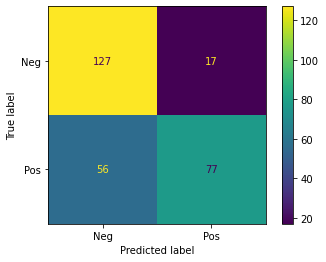

In [15]:
nb = MultinomialNB()
nb.fit(cv_X_train,y_train)

def report(model):
    pred = model.predict(cv_X_test)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model,cv_X_test,y_test)

print('CV NB MODEL')
report(nb)

- From the confusion matrix we can see 56 observations have been classified as false negative and 17 observations have been classified as false positive

# Task 2
## Improvements

- An accuracy of 74% was obtained using MultinomialNB classifier, which isn't accurate enough to be deemed a good classification model. so other classifiers will be explored
- CountVectorizer is inferior to TF-IDF since it also considers the importance of words unlike CountVectorizer which only focuses on word frequency
- Different stopword library to be used since there are more extensive options other than nltk
- Built-in sklearn stopword list consists of 318 stopwords as opposed to nltk's 179

In [16]:
len(sw)

179

In [17]:
len(_stop_words.ENGLISH_STOP_WORDS)

318

## Implementing TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

def report(model):
    pred = model.predict(tfidf_X_test)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model, tfidf_X_test, y_test)

tfidf = TfidfVectorizer()
tfidf.fit(X_train)

tfidf_X_train = tfidf.transform(X_train)
tfidf_X_test = tfidf.transform(X_test)

nb = MultinomialNB()
nb.fit(tfidf_X_train, y_train)

MultinomialNB()

TF-IDF NB MODEL
              precision    recall  f1-score   support

         Neg       0.78      0.83      0.80       144
         Pos       0.80      0.74      0.77       133

    accuracy                           0.79       277
   macro avg       0.79      0.79      0.79       277
weighted avg       0.79      0.79      0.79       277



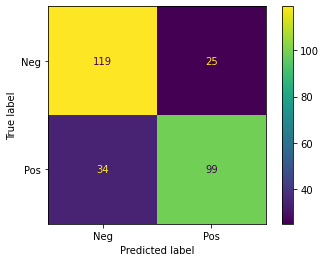

In [19]:
print('TF-IDF NB MODEL')
report(nb)

- Using TF-IDF, the accuracy has increased by 5% to 79%, and this can further be improved by using a more extensive stopword list in combination

REVISED TF-IDF NB MODEL
              precision    recall  f1-score   support

         Neg       0.85      0.75      0.80       144
         Pos       0.76      0.86      0.81       133

    accuracy                           0.80       277
   macro avg       0.81      0.80      0.80       277
weighted avg       0.81      0.80      0.80       277



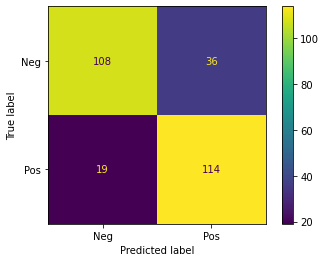

In [20]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf.fit(X_train)

tfidf_X_train = tfidf.transform(X_train)
tfidf_X_test = tfidf.transform(X_test)

nb = MultinomialNB()
nb.fit(tfidf_X_train, y_train)

print('REVISED TF-IDF NB MODEL')
report(nb)

## Exploring Alternate Classification Algorithms

Upon further research on the comparison of logistic regression to naive-bayes classification, I have decided to test such regression model since is said to perform better when there is a larger volume of training data available. This is because naive-bayes reaches its asymptotic error quicker than logistic regression with regards to the training data available (Halloran, John T.. “Classification: Naive Bayes vs Logistic Regression.” (2009)).

- Fitting data to logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(tfidf_X_train,y_train)

LogisticRegression()

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

         Neg       0.84      0.82      0.83       144
         Pos       0.81      0.83      0.82       133

    accuracy                           0.83       277
   macro avg       0.83      0.83      0.83       277
weighted avg       0.83      0.83      0.83       277



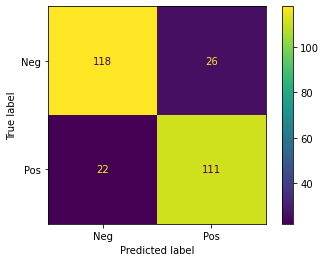

In [22]:
print('LOGISTIC REGRESSION MODEL')
report(log)

- Evidently, the new model performs better than the old model since the accuracy has improved from 80% (originally 74%) to 83%
- This may be because logistic regression performs better when there is more training data available as naive-bayes models approach their asymptotic error quicker
- The models in task 2 also feature a larger stopword list which may contribute to better extraction of important features in determining sentiment